In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)

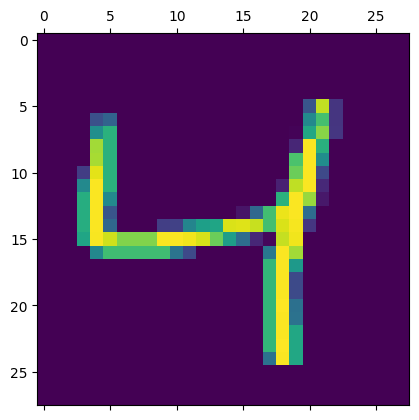

In [ ]:
plt.matshow(x_train[2])

In [ ]:
#Scaling
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# flattening the data
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.2760 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1270 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0881 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0681 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9837


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9751


[0.0783412754535675, 0.9750999808311462]

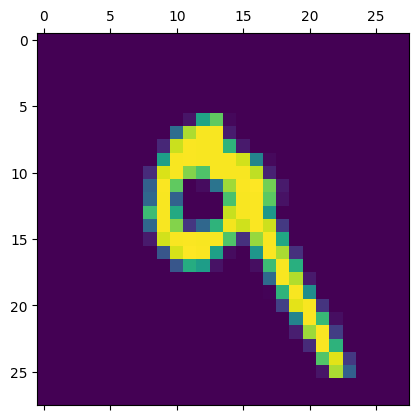

In [ ]:
plt.matshow(x_test[7])

In [ ]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predicted[7]

array([4.8243819e-04, 3.6192438e-01, 6.8116045e-01, 4.0995365e-01,
       9.7797352e-01, 9.8039657e-02, 4.5571605e-06, 2.7954280e-01,
       1.7934101e-02, 9.9778467e-01], dtype=float32)

An output in the form of probabilities for each class is obtained. We take the class with the highest probability to be our answer

In [ ]:
np.argmax(y_predicted[7])

9

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
